In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing pytorch❤️‍🩹
import torch 
from torch import nn

#torchvision
import torchvision 
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"Pytorch Version: {torch.__version__} | torchvision version {torchvision.__version__}")

Pytorch Version: 2.1.2 | torchvision version 0.16.2


In [3]:
#Downloading our data
train_data = datasets.FashionMNIST(
    root = "data" , 
    train = True , 
    download = True , 
    transform = ToTensor() , 
    target_transform = None
)
test_data = datasets.FashionMNIST(
    root = "data" , 
    train = False , 
    download = True , 
    transform = ToTensor() , 
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13322260.48it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209276.30it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3931187.23it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10517426.69it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_data.data) ,len(test_data.data)

(60000, 10000)

In [7]:
#classes 
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


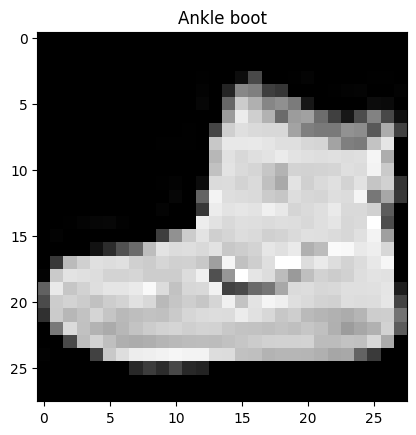

In [8]:
#visualizing data
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze() , cmap = "gray")
plt.title(class_names[label]);

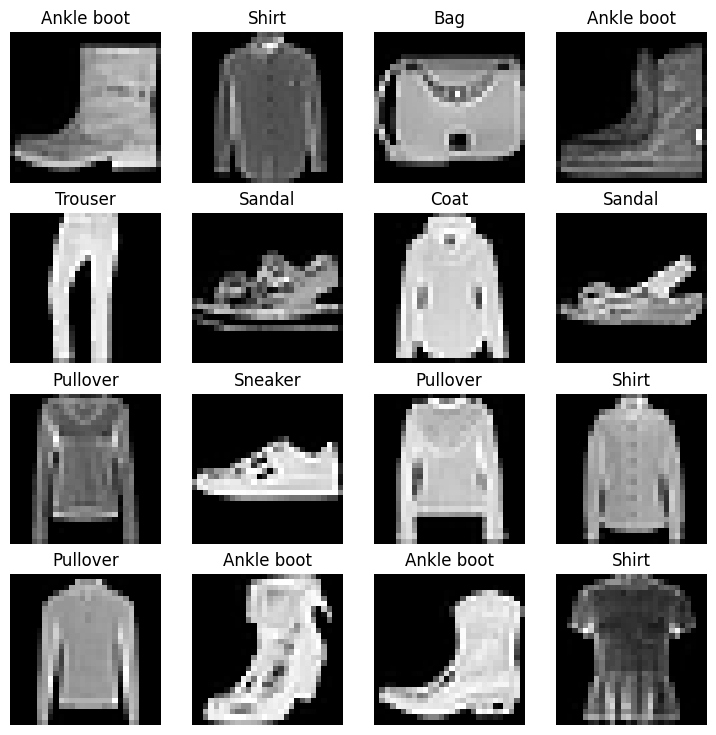

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9 , 9))
rows, cols = 4 , 4 
for i in range(1 , rows * cols + 1):
    random_idx = torch.randint(0 , len(train_data) , size = [1]).item()
    img , label = train_data[random_idx]
    plt.subplot(rows , cols , i)
    plt.imshow(img.squeeze() , cmap = "gray")
    plt.title(class_names[label])
    plt.axis(False)

## Preparing DataLoader

In [10]:
from torch.utils.data import DataLoader

Batch_size = 32 

train_dataloader = DataLoader(train_data , 
                             batch_size = Batch_size , 
                             shuffle = True) #shuffling every epoch
test_dataloader = DataLoader(test_data , 
                            batch_size = Batch_size , 
                            shuffle = False)


print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {Batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {Batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e57b6801480>, <torch.utils.data.dataloader.DataLoader object at 0x7e57b6801900>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6 , label size: torch.Size([])


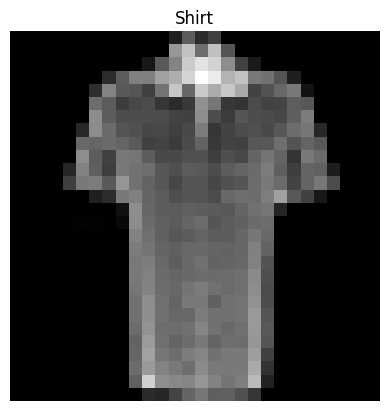

In [12]:
#showing a sample
torch.manual_seed(42)
random_idx = torch.randint(0 , len(train_features_batch) , size = [1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze() , cmap = "gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label} , label size: {label.shape}")

## Building a baseline model!

In [13]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")
# print(x)
# print(output)

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [14]:
torch.manual_seed(42)
class FashionMNIST_v0(nn.Module):
    def __init__(self , input_shape: int , hidden_units: int , output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten() , 
            nn.Linear(in_features = input_shape , out_features = hidden_units) , 
            nn.Linear(in_features = hidden_units , out_features = output_shape)
       
        )
        
    def forward(self , x):
        return self.layer_stack(x)
model_0 = FashionMNIST_v0(input_shape=784 , 
                         hidden_units = 10 , 
                         output_shape = len(class_names))
model_0.to("cpu")

FashionMNIST_v0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [15]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task = "multiclass" , num_classes = len(class_names))

In [16]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters() , lr = 0.1)

In [17]:
from timeit import default_timer as timer 
def print_train_time(start: float , end: float, device: torch.device= None):
    """Prints difference between start and end time.    
    """
    total_time = end - start 
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## Training loop to evaluate on batches of data

In [18]:
from tqdm.auto import tqdm 
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    
    train_loss = 0 
    
    for batch, (X, y) in enumerate(train_dataloader):
        #training
        model_0.train()
        y_pred = model_0(X)
        
        #loss 
        loss = loss_func(y_pred , y)
        train_loss += loss 
        
        #optimizer
        optimizer.zero_grad()
        
        #backward propagation 
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    
    test_loss, test_acc = 0 , 0 
    model_0.eval()
    with torch.no_grad():
        for X ,  y in test_dataloader:
            test_pred = model_0(X)
            
            test_loss += loss_func(test_pred , y)
            
            test_acc += acc_fn(y , test_pred.argmax(dim = 1))
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
            
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu , 
                                           end = train_time_end_on_cpu , 
                                           device = str(next(model_0.parameters()).device))
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 0.82%

Epoch: 1
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 0.83%

Epoch: 2
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 0.83%

Train time on cpu: 30.311 seconds


In [19]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module , 
              data_loader: torch.utils.data.DataLoader , 
              loss_fn: torch.nn.Module , acc_fn ):
    loss , acc = 0 , 0 
    model.eval()
    with torch.no_grad():
        for X , y in data_loader:
            X , y = X , y
            y_pred = model(X)
        
            loss += loss_fn(y_pred , y)
            acc += acc_fn( y , y_pred.argmax(dim = 1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__  , 
           "model_loss": loss.item(),
           "model_acc": acc.item()}

model_0_results = eval_model(model = model_0 , data_loader = test_dataloader , 
                            loss_fn = loss_func , acc_fn = acc_fn)
model_0_results

{'model_name': 'FashionMNIST_v0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8342651724815369}

## Making predictions

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model with non-linearity

In [21]:
class FashionMNISTv1(nn.Module):
    def __init__(self , input_shape: int , hidden_units: int , output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape , out_features = hidden_units) , 
            nn.ReLU(),
            nn.Linear(in_features = hidden_units , out_features = output_shape),
            nn.ReLU()
       
        )
        
    def forward(self , x):
        return self.layer_stack(x)

In [22]:
torch.manual_seed(42)
model_1 = FashionMNISTv1( input_shape = 784  ,
                        hidden_units = 10 , 
                        output_shape = len(class_names))
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters() , 
                           lr = 0.01)

In [24]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module , 
              data_loader: torch.utils.data.DataLoader , 
              loss_fn: torch.nn.Module , acc_fn , 
              device: torch.device = device):
    loss , acc = 0 , 0 
    model.eval()
    with torch.no_grad():
        for X , y in data_loader:
            X , y = X.to(device) , y.to(device)
            y_pred = model(X)
        
            loss += loss_fn(y_pred , y)
            acc += acc_fn( y , y_pred.argmax(dim = 1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__  , 
           "model_loss": loss.item(),
           "model_acc": acc.item()}


In [25]:
## Creating functions for training and testing loop 

#Function for training
def train_step(model: torch.nn.Module , 
              data_loader: torch.utils.data.DataLoader , 
              loss_fn: torch.nn.Module , 
              optimizer: torch.optim.Optimizer , 
              accuracy_fn , 
              device: torch.device = device):
    train_loss , train_acc = 0 , 0 
    model.to(device)
    model.train()
    for batch , (X , y) in enumerate(data_loader):
        X , y = X.to(device) , y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred , y)
        train_loss += loss
        
        train_acc += accuracy_fn( y , y_pred.argmax(dim = 1))
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
     #average loss and accuracy per epoch    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")
 
#function for testing
def test_step(model: torch.nn.Module , 
              data_loader: torch.utils.data.DataLoader , 
              loss_fn: torch.nn.Module ,  
              accuracy_fn , 
              device: torch.device = device):
    test_loss , test_acc = 0 , 0 
    model.to(device)
    model.eval()
    with torch.no_grad():
        for X , y in data_loader:
            X , y = X.to(device) , y.to(device)
            
            test_pred = model(X)
            
            test_loss += loss_fn(test_pred , y)
            test_acc += accuracy_fn(y , test_pred.argmax(dim = 1))
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")

In [26]:
torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3 
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n------")
    train_step(data_loader = train_dataloader , 
              model= model_1 , 
              loss_fn = loss_fn , 
              optimizer = optimizer , 
              accuracy_fn = acc_fn.to(device) , 
              )
    test_step(data_loader = test_dataloader , 
             model= model_1 , 
             loss_fn = loss_fn , 
             accuracy_fn = acc_fn.to(device))
    
train_time_end_on_gpu = timer()
total_training_time_model_1 = print_train_time(start = train_time_start_on_gpu , 
                                              end = train_time_end_on_gpu , 
                                              device = device)

Epoch: 0
------
Train loss: 1.42179 | Train acc: 0.54
Test loss: 1.12168 | Test acc: 0.62
Epoch: 1
------
Train loss: 1.03359 | Train acc: 0.65
Test loss: 1.00019 | Test acc: 0.64
Epoch: 2
------
Train loss: 0.95996 | Train acc: 0.66
Test loss: 0.96338 | Test acc: 0.65
Train time on cuda: 36.183 seconds


In [27]:
model_1_result = eval_model(model = model_1 , 
                          data_loader = test_dataloader , 
                          loss_fn = loss_fn , 
                          acc_fn = acc_fn.to(device),
                          )
model_1_result

{'model_name': 'FashionMNISTv1',
 'model_loss': 0.963383674621582,
 'model_acc': 0.6540535092353821}

In [28]:
model_0_results

{'model_name': 'FashionMNIST_v0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8342651724815369}

## Training A Convolutional NN

In [29]:
class FashionMNISTv2(nn.Module):
    def __init__(self , input_shape: int , hidden_units: int , output_shape : int ):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape , 
                     out_channels = hidden_units , 
                     kernel_size = 3 , 
                     stride = 1 , 
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units , 
                     out_channels = hidden_units , 
                     kernel_size = 3 , 
                     stride = 1 , 
                     padding = 1),
            nn.ReLU() , 
            nn.MaxPool2d(kernel_size = 2 , 
                        stride = 2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels = hidden_units , 
                out_channels = hidden_units , 
                kernel_size = 3, 
                padding = 1
            ),
            nn.ReLU(),
            nn.Conv2d(hidden_units , 
                     hidden_units , 
                     kernel_size = 3, 
                     padding = 1),
            nn.ReLU() , 
            nn.MaxPool2d(kernel_size = 2 , 
                        stride = 2 ) 
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features = hidden_units* 7 *7 , 
                     out_features = output_shape )  
            
        )
    def forward(self , x):
        x = self.block_1(x)
        x = self.block_2(x)
        out = self.classifier(x)
        return out
    
torch.manual_seed(42)
model_2 = FashionMNISTv2(
    input_shape =1  , 
    hidden_units = 10 , 
    output_shape = len(class_names)
).to(device)
model_2

FashionMNISTv2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [30]:
torch.manual_seed(42)

images = torch.randn(size = (32 , 3 , 64 , 64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Single image pixel values:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Single image pixel values:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]]

In [31]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3 , 
                      out_channels = 10 , 
                      kernel_size = 3 , 
                      stride = 1 , 
                      padding = 0 )
result = conv_layer(test_image)

In [32]:
result.shape

torch.Size([10, 62, 62])

In [33]:
conv_layer(test_image.unsqueeze(dim = 0)).shape

torch.Size([1, 10, 62, 62])

In [34]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels = 3 , 
                        out_channels = 10 , 
                        kernel_size = 5 , 
                        stride = 2 , 
                        padding = 0)
conv_layer_2(test_image.unsqueeze(dim = 0)).shape

torch.Size([1, 10, 30, 30])

In [35]:
conv_layer_2.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
                        [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
                        [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
                        [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
                        [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],
              
                       [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
                        [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
                        [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
                        [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
                        [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],
              
                       [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
                        [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
                        [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
                     

## Loss function and optimizer for CNN model

In [36]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters() , 
                           lr = 0.1)

In [37]:
torch.manual_seed(42)

train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model = model_2 , 
              data_loader = train_dataloader , 
              loss_fn = loss_fn , 
              optimizer = optimizer ,
              accuracy_fn = acc_fn , 
              device = device)
    test_step(model = model_2 , 
             data_loader = test_dataloader , 
             loss_fn = loss_fn , 
             accuracy_fn = acc_fn , 
             device = device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2, 
                                           end = train_time_end_model_2 , 
                                           device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59371 | Train acc: 0.78
Test loss: 0.40664 | Test acc: 0.85
Epoch: 1
-------
Train loss: 0.36361 | Train acc: 0.87
Test loss: 0.35543 | Test acc: 0.87
Epoch: 2
-------
Train loss: 0.32604 | Train acc: 0.88
Test loss: 0.33624 | Test acc: 0.88
Train time on cuda: 41.786 seconds


In [38]:
eval_model?

Signature:
eval_model(
    model: torch.nn.modules.module.Module,
    data_loader: torch.utils.data.dataloader.DataLoader,
    loss_fn: torch.nn.modules.module.Module,
    acc_fn,
    device: torch.device = 'cuda',
)
Docstring: <no docstring>
File:      /tmp/ipykernel_34/4066063703.py
Type:      function

In [39]:
model_2_results = eval_model(
    model = model_2 , 
    data_loader = test_dataloader , 
    loss_fn = loss_fn , 
    acc_fn = acc_fn 
)
model_2_results

{'model_name': 'FashionMNISTv2',
 'model_loss': 0.33623793721199036,
 'model_acc': 0.8785942196846008}

In [40]:
compare_results = pd.DataFrame([model_0_results , model_1_result , model_2_results])
compare_results["training_time"] = [total_train_time_model_0 , 
                                   total_training_time_model_1 , 
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNIST_v0,0.476639,0.834265,30.310802
1,FashionMNISTv1,0.963384,0.654054,36.182858
2,FashionMNISTv2,0.336238,0.878594,41.786025


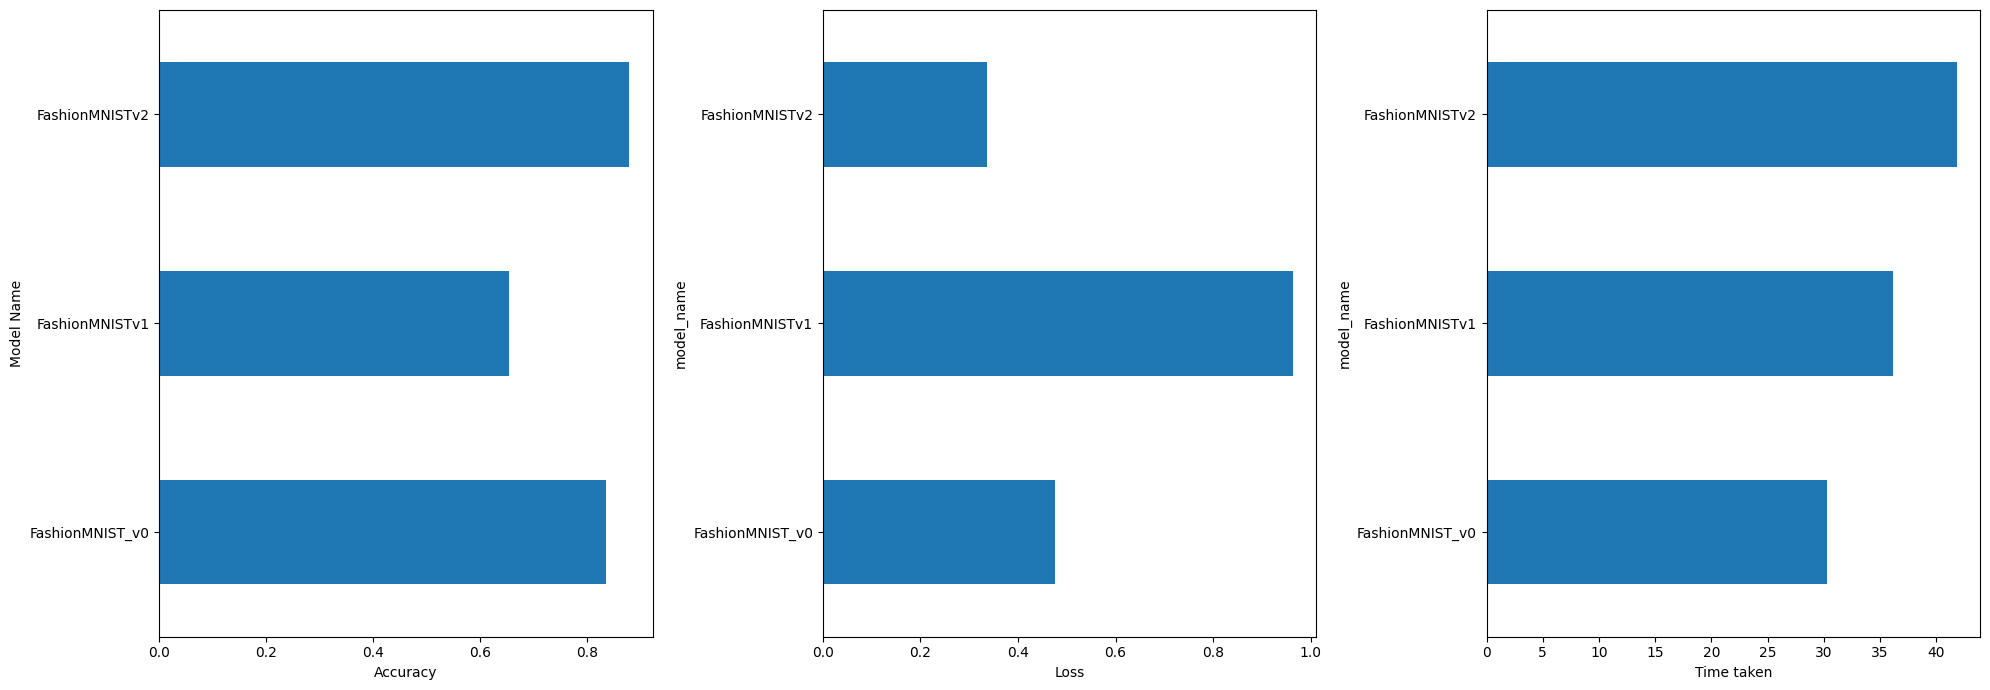

In [41]:
plt.figure(figsize=(20 , 7))
ax1 = plt.subplot(131)
compare_results.set_index("model_name")["model_acc"].plot(kind="barh", ax=ax1)
ax1.set_xlabel("Accuracy")
ax1.set_ylabel("Model Name")  # Set the y-axis label for the first plot only

# Plot the second subplot with default y-axis label
ax2 = plt.subplot(132)
compare_results.set_index("model_name")["model_loss"].plot(kind="barh", ax=ax2)
ax2.set_xlabel("Loss")

# Plot the third subplot with default y-axis label
ax3 = plt.subplot(133)
compare_results.set_index("model_name")["training_time"].plot(kind="barh", ax=ax3)
ax3.set_xlabel("Time taken")

plt.tight_layout() # Adjust spacing between subplots
plt.show()

## Making predictions on random data and evaluating it!!

In [42]:
def make_predictions(model: torch.nn.Module , 
                    data: list , 
                    device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.no_grad():
        for sample in data:
            sample = torch.unsqueeze(sample , dim = 0).to(device)
            
            pred_logit = model(sample)
            
            pred_prob = torch.softmax(pred_logit.squeeze() , dim = 0)
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [43]:
test_data_features , test_data_labels = test_data[0]
test_data_features.shape , test_data_labels

(torch.Size([1, 28, 28]), 9)

In [44]:
import random 
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data) , k = 9):
    test_samples.append(sample)
    test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [45]:
pred_probs = make_predictions(model_2 , 
                             data = test_samples)
pred_probs[:2]

tensor([[2.3583e-06, 4.8107e-07, 8.7321e-07, 3.5259e-06, 3.5129e-07, 9.9927e-01,
         6.4814e-06, 6.6327e-05, 3.0180e-04, 3.4666e-04],
        [2.5945e-02, 6.4864e-01, 3.2444e-04, 1.2059e-01, 1.0153e-01, 1.4920e-04,
         1.0171e-01, 4.6175e-04, 3.5235e-04, 2.9827e-04]])

In [46]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

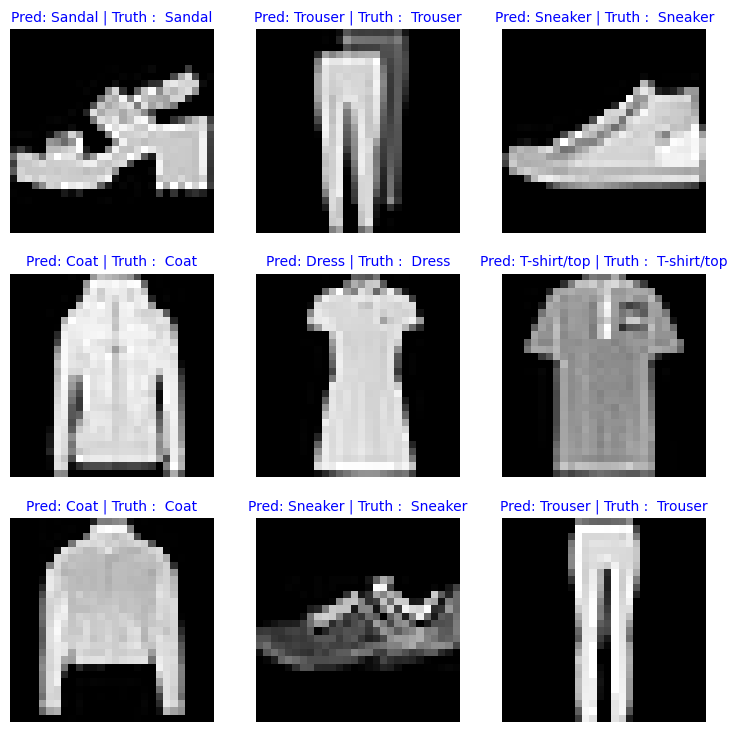

In [47]:
plt.figure(figsize = (9 , 9))
nrows = 3 
ncols = 3 
for i , sample in enumerate(test_samples):
    plt.subplot(nrows , ncols , i+1)
    plt.imshow(sample.squeeze() , cmap = "gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth :  {pred_label}"
    if pred_label == truth_label:
        plt.title(title_text , fontsize = 10 , c = "b")
    else:
        plt.title(title_text , fontsize = 10 , c = "r")
    plt.axis(False);

## Making confusion matrix for further prediction evaluation.

In [53]:
test_data_feature, test_label = next(iter(test_dataloader))
len(test_data_feature)

32

In [48]:
y_preds = []
model_2.eval()
with torch.no_grad():
    for X , y in tqdm(test_dataloader , desc = "Making predictions"):
        X , y = X.to(device) , y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit , dim = 1).argmax(dim = 1)
        
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [54]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [59]:
classes = [class_names[i] for i in test_data.targets.unique()]

In [60]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

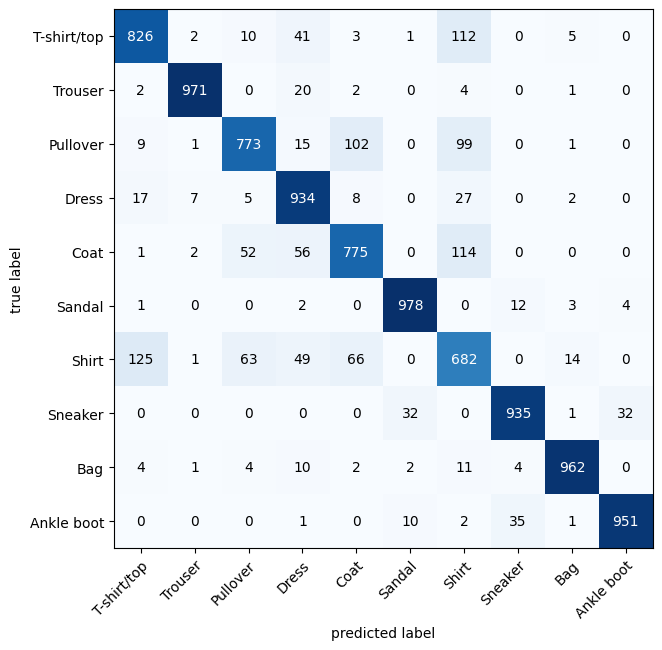

In [62]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#setting up confusion matrix instance and comparing predictions 
confmat = ConfusionMatrix(num_classes = len(class_names) , task  = "multiclass")
confmat_tensor =  confmat(preds = y_pred_tensor , 
                         target = test_data.targets)

#plotting the confusion matrix
fig , ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names , 
    figsize = (10 , 7)
);